Impoting the libraries as per required.Data is related to predicting the accuracy of the model so we are using Logistic regression for it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot
from matplotlib.colors import ListedColormap

In [2]:

#importing the data file which I stored in Excel format.

dataframe=pd.read_excel("result.xlsx")
dataframe.head()


,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02T02:32:29Z,2021-09-05T18:30:00Z,2021-08-07T13:50:21.965794Z,9393307,INMUN,2021-08-31T08:45:09.54Z
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03T03:17:16Z,2021-09-05T18:30:00Z,2021-08-07T06:24:55.229106Z,9393307,INMUN,2021-08-31T08:45:09.54Z
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04T02:53:17Z,2021-09-05T18:30:00Z,2021-08-07T20:52:36.357922Z,9393307,INMUN,2021-08-31T08:45:09.54Z
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04T23:55:04Z,2021-09-05T18:30:00Z,2021-08-08T16:25:14.146273Z,9393307,INMUN,2021-08-31T08:45:09.54Z
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06T00:33:44Z,2021-09-05T18:30:00Z,2021-08-08T15:46:31.015292Z,9393307,INMUN,2021-08-31T08:45:09.54Z


In [3]:
#initial check and finding null values of the data.

dataframe.isnull().values.any()

False

In [4]:
#finding the datatypes of the imported data.
dataframe.dtypes


vessel_live_info_id      object
timestamp_utc            object
scheduled_arrival_utc    object
estimated_arrival_utc    object
imo                       int64
port_code                object
actual_arrival_utc       object
dtype: object

In [5]:
#chamging the datatype from object to date time for the prediction.

dataframe['estimated_arrival_utc'] = dataframe['estimated_arrival_utc'].astype('datetime64[ns]')
dataframe["scheduled_arrival_utc"] = pd.to_datetime(dataframe["scheduled_arrival_utc"], 
 format ="%Y-%m-%dT%H:%M:%SZ", 
 errors = "coerce")
dataframe['estimated_arrival_utc'] = dataframe['estimated_arrival_utc'].astype('datetime64[ns]')
dataframe["timestamp_utc"] = pd.to_datetime(dataframe["timestamp_utc"], 
 format = "%Y-%m-%dT%H:%M:%SZ", 
 errors="coerce")
dataframe['actual_arrival_utc'] = dataframe['actual_arrival_utc'].astype('datetime64[ns]')

In [6]:
dataframe.dtypes

vessel_live_info_id              object
timestamp_utc            datetime64[ns]
scheduled_arrival_utc    datetime64[ns]
estimated_arrival_utc    datetime64[ns]
imo                               int64
port_code                        object
actual_arrival_utc       datetime64[ns]
dtype: object

In [7]:
#metric for analysis.
dataframe["Actual_view"]=dataframe["actual_arrival_utc"]-dataframe["timestamp_utc"]
dataframe["Prediction_view"]=dataframe["estimated_arrival_utc"]-dataframe["timestamp_utc"]
dataframe["days_gap"]=dataframe["actual_arrival_utc"]-dataframe["estimated_arrival_utc"]

#days_gap define the no of gaps in days between actual and estimated values.


#checking how many entries of estimated time by portcast is same as that of actual arrival.
(dataframe["estimated_arrival_utc"]==dataframe["actual_arrival_utc"]).sum()


#checking how many entries have estimate time less than that of arrival time which shows the estimation made is
#wrong which leads to wrong expectations.
(dataframe["estimated_arrival_utc"]<=dataframe["actual_arrival_utc"]).sum()


#checking how many entries have estimate time greater than that of arrival time which shows the estimation made is
#good which leads to customer expecting the product come earlier than expected.
(dataframe["estimated_arrival_utc"]>=dataframe["actual_arrival_utc"]).sum()



#checking how many entries have arrived as same as that of scheduled time which shows 100% accuracy of arrival of product.
(dataframe["scheduled_arrival_utc"]==dataframe["actual_arrival_utc"]).sum()


#finding the minimum and maximum number of days of the actual view and prediction view.
dataframe["Actual_view"].min()
dataframe["Actual_view"].max()
dataframe["Prediction_view"].min()
dataframe["Prediction_view"].max()

#maximum days gap where actual time is greater than estimated time which means there is a entry which states that
#product arrived 48 dyas earlier than expected.
dataframe["days_gap"].max()

#maximum days gap where actual time is lesser than estimated time which means there is a entry which states that
#product arrived 51 dyas later than expected.
dataframe["days_gap"].min()




#dataframe["actual_arrival_utc"] = pd.to_numeric(dataframe["actual_arrival_utc"])
#dataframe["timestamp_utc"] = pd.to_numeric(dataframe["timestamp_utc"])
#dataframe["scheduled_arrival_utc"] = pd.to_numeric(dataframe["scheduled_arrival_utc"])
#dataframe["Actual_view"] = pd.to_numeric(dataframe["Actual_view"])
#dataframe["Prediction_view"] = pd.to_numeric(dataframe["Prediction_view"])
#dataframe["days_gap"] = pd.to_numeric(dataframe["days_gap"])
#dataframe["estimated_arrival_utc"] = pd.to_numeric(dataframe["estimated_arrival_utc"])
dataframe.dtypes











vessel_live_info_id               object
timestamp_utc             datetime64[ns]
scheduled_arrival_utc     datetime64[ns]
estimated_arrival_utc     datetime64[ns]
imo                                int64
port_code                         object
actual_arrival_utc        datetime64[ns]
Actual_view              timedelta64[ns]
Prediction_view          timedelta64[ns]
days_gap                 timedelta64[ns]
dtype: object

In [20]:
df=dataframe
df["EsitimatedDay_year"] = df["estimated_arrival_utc"].dt.year
df["EstimatedDay_month"] = df["estimated_arrival_utc"].dt.month
df["EstimatedDay_week"] = df["estimated_arrival_utc"].dt.week
df["EstimatedDay_day"] = df["estimated_arrival_utc"].dt.day
df["EstimatedDay_hour"] = df["estimated_arrival_utc"].dt.hour
df["EstimatedDay_minute"] = df["estimated_arrival_utc"].dt.minute


df["ActualDay_year"] = df["actual_arrival_utc"].dt.year
df["ActualDay_month"] = df["actual_arrival_utc"].dt.month
df["ActualDay_week"] = df["actual_arrival_utc"].dt.week
df["ActualDay_day"] = df["actual_arrival_utc"].dt.day
df["ActualDay_hour"] = df["actual_arrival_utc"].dt.hour
df["ActualDay_minute"] = df["actual_arrival_utc"].dt.minute


df["Daygap_year"] = df["days_gap"].dt.days
df.head()


<ipython-input-20-da1128e9a890>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["EstimatedDay_week"] = df["estimated_arrival_utc"].dt.week
<ipython-input-20-da1128e9a890>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["ActualDay_week"] = df["actual_arrival_utc"].dt.week


,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,Actual_view,Prediction_view,days_gap,...,EstimatedDay_hour,EstimatedDay_minute,ActualDay_year,ActualDay_month,ActualDay_week,ActualDay_day,ActualDay_hour,ActualDay_minute,OUTPUT_LABEL,Daygap_year
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29,2021-09-05 18:30:00,2021-08-07 13:50:21.965794,9393307,INMUN,2021-08-31 08:45:09.540,60 days 06:12:40.540000,36 days 11:17:52.965794,23 days 18:54:47.574206,...,13,50,2021,8,35,31,8,45,0,23
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16,2021-09-05 18:30:00,2021-08-07 06:24:55.229106,9393307,INMUN,2021-08-31 08:45:09.540,59 days 05:27:53.540000,35 days 03:07:39.229106,24 days 02:20:14.310894,...,6,24,2021,8,35,31,8,45,0,24
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17,2021-09-05 18:30:00,2021-08-07 20:52:36.357922,9393307,INMUN,2021-08-31 08:45:09.540,58 days 05:51:52.540000,34 days 17:59:19.357922,23 days 11:52:33.182078,...,20,52,2021,8,35,31,8,45,0,23
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04,2021-09-05 18:30:00,2021-08-08 16:25:14.146273,9393307,INMUN,2021-08-31 08:45:09.540,57 days 08:50:05.540000,34 days 16:30:10.146273,22 days 16:19:55.393727,...,16,25,2021,8,35,31,8,45,0,22
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44,2021-09-05 18:30:00,2021-08-08 15:46:31.015292,9393307,INMUN,2021-08-31 08:45:09.540,56 days 08:11:25.540000,33 days 15:12:47.015292,22 days 16:58:38.524708,...,15,46,2021,8,35,31,8,45,0,22


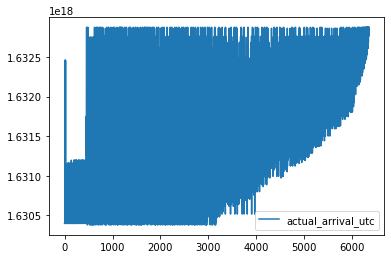

In [32]:
dataframe.plot.line(y="actual_arrival_utc")
plot.show(block=True)

In [35]:
#splitting the data into train and test for the prediction and finding the accuracy.
df["Daygap_year"].value_counts()
df["OUTPUT_LABEL"] = (df["Daygap_year"] == "0").astype("int")
df.columns


Index(['vessel_live_info_id', 'timestamp_utc', 'scheduled_arrival_utc',
       'estimated_arrival_utc', 'imo', 'port_code', 'actual_arrival_utc',
       'Actual_view', 'Prediction_view', 'days_gap', 'ScheduledDay_year',
       'ScheduledDay_month', 'ScheduledDay_week', 'ScheduledDay_day',
       'ScheduledDay_hour', 'ScheduledDay_minute', 'EsitimatedDay_year',
       'EstimatedDay_month', 'EstimatedDay_week', 'EstimatedDay_day',
       'EstimatedDay_hour', 'EstimatedDay_minute', 'ActualDay_year',
       'ActualDay_month', 'ActualDay_week', 'ActualDay_day', 'ActualDay_hour',
       'ActualDay_minute', 'OUTPUT_LABEL', 'Daygap_year'],
      dtype='object')

In [40]:

y=dataframe.iloc[:,[6]]
X=dataframe.iloc[:,[16,17,18,19,20,21,22]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_test=scaler.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

score=accuracy_score(y_test,pred)
score

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08188976377952756